# Лаборатораная работа №4
### Обучение без учителя. Задача кластеризации

### Загрузка и подготовка данных

- Генерация датасетa с использованием функции ```make_classification``` 


In [56]:
from sklearn.cluster import DBSCAN, KMeans, AffinityPropagation
from sklearn.mixture import GaussianMixture

In [57]:
from ml_library.clusters import plot_scatter, plot_scatter_gm, print_metrics, elbow_method, siluet_method

In [58]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, fowlkes_mallows_score, rand_score
from sklearn.datasets import make_classification, make_blobs
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
data_class, data_class_y = make_classification(n_samples=500, n_classes=3, n_features=3, n_redundant=0, n_clusters_per_class=1, flip_y=0, random_state=56)

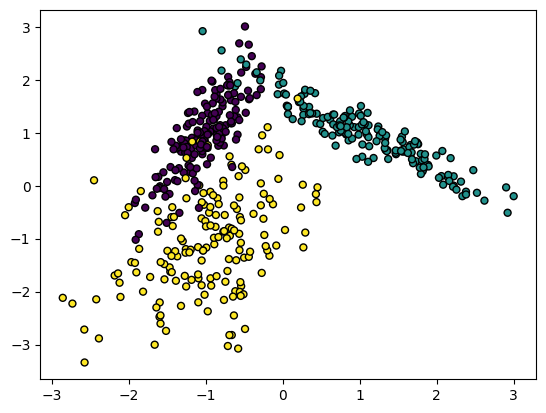

In [60]:
plt.scatter(data_class[:, 0], data_class[:, 1], marker="o", c=data_class_y, s=25, edgecolor="k")
plt.show()


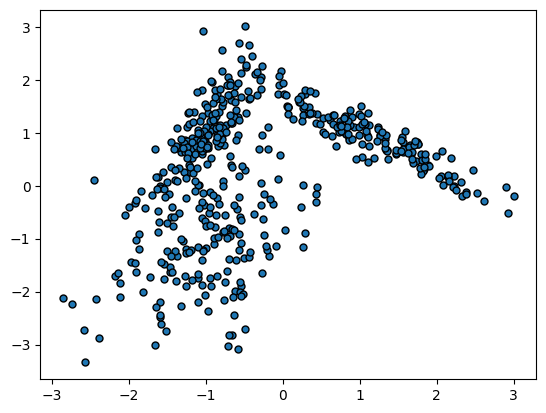

In [61]:
plt.scatter(data_class[:, 0], data_class[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

- Генерация датасета с импользованеим функции ```make_blobs``` 

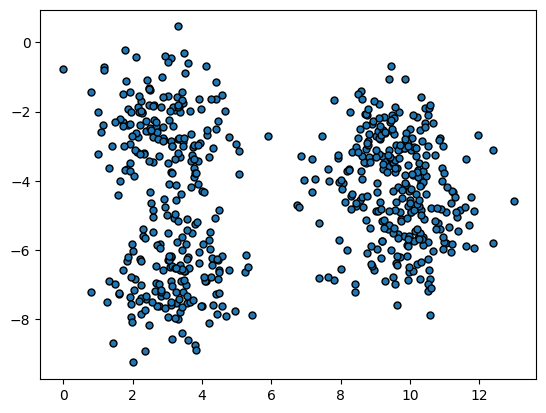

In [62]:
data_blobs, _ = make_blobs(n_samples=600, n_features=2, random_state=30, centers=4)

plt.scatter(data_blobs[:, 0], data_blobs[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

#### Сохранение данных

In [63]:
data_class = pd.DataFrame(data_class)
data_class['3'] = data_class_y
data_class.to_csv('data_class.csv', index=False)

In [64]:
data_blobs = pd.DataFrame(data_blobs)
data_blobs.to_csv('data_blobs.csv', index=False)

### Решение кластеризации

- Реализовать следующие алгоритмы кластеризации на **синтетических данных**
    1. <span style = "color:rgb(204, 245, 133)"> k-means </span>
    2. <span style = "color:rgb(215, 106, 51)"> DBSCAN </span>
    3. <span style = "color:rgb(133, 204, 245)"> EM-алгоритм </span>
    4. <span style = "color:rgb(148, 97, 234)"> Affinity Propagation </span>
    5. <span style = "color:rgb(124, 82, 118)"> Иерархическая кластеризация </span>

#### <span style = "color:rgb(204, 245, 133)"> k-means </span>

- data_blobs

In [65]:
kmeans_blobs = KMeans(4, n_init='auto', ).fit(data_blobs)

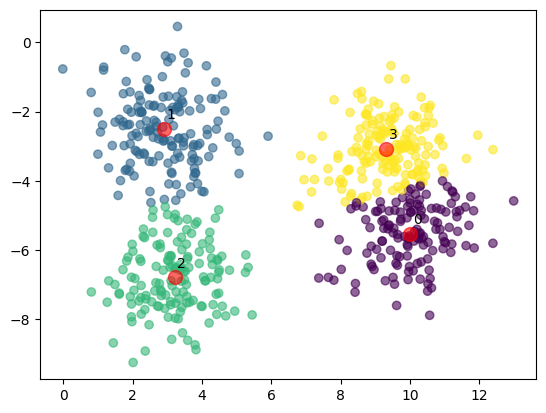

In [66]:
plot_scatter(kmeans_blobs, data_blobs)

##### Внутренние метрики

In [67]:
print_metrics(kmeans_blobs, data_blobs)

            Внутренние метрики
Silhouette            0.512295
Calinski           1560.714635


#####

- data_class

In [68]:
data_class_y = data_class['3']
data_class = data_class.drop(columns=['3'])

In [69]:
kmeans_class = KMeans(3, n_init='auto', init='k-means++').fit(data_class)

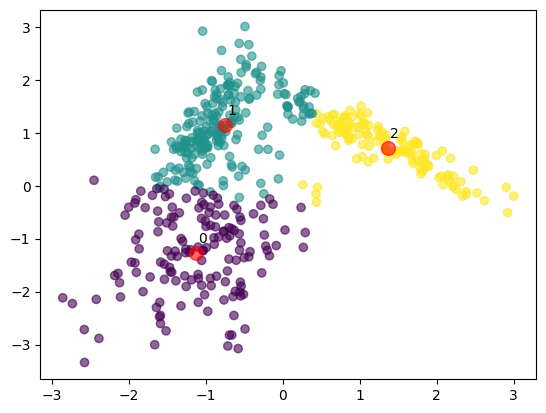

In [70]:
plot_scatter(kmeans_class, data_class)

##### Внутренние/внешние метрики

In [71]:
print_metrics(kmeans_class, data_class, data_class_y, True)

            Внутренние метрики
Silhouette            0.354166
Calinski            310.002474
               Внешние метрики
R-score               0.810942
Fowlkes-score         0.721357


**ПОДБОР ОПТИМАЛЬНЫX ГИПЕРПАРАМЕТРОВ**

<font size = 5><span style = "color:rgb(135, 106, 134)">Метод локтя </span>, <span style = "color:rgb(117, 43, 43)"> Метод Силуэта</span></font>

- Для ```data_blobs```

Метод Локтя


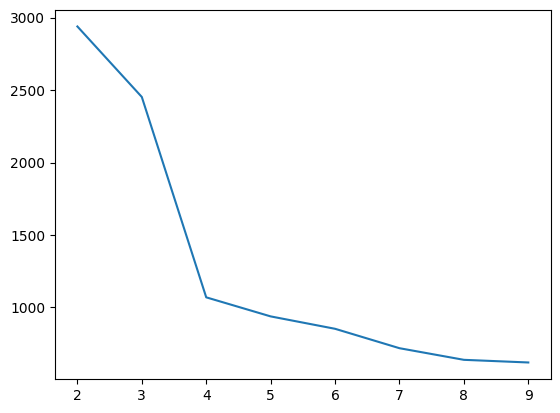

In [72]:
elbow_method(data_blobs)

Метод силуэта


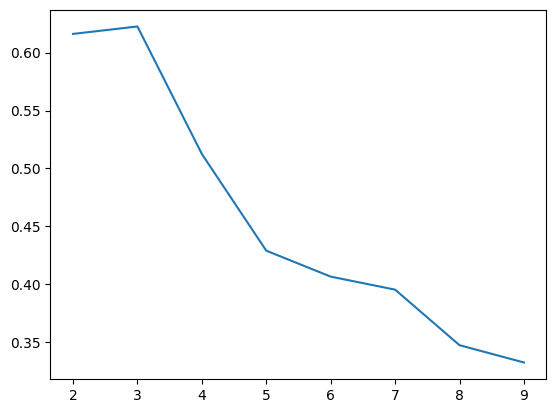

In [73]:
siluet_method(data_blobs)

> Оптимальное количество кластеров для data_blobs: **3**

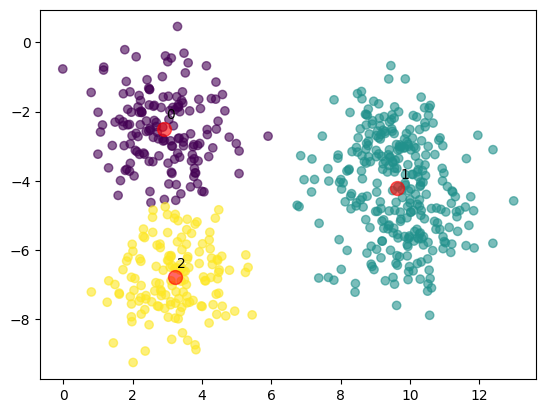

In [74]:
kmeans_blobs = KMeans(3, init='k-means++', n_init='auto').fit(data_blobs)

plot_scatter(kmeans_blobs, data_blobs)

In [160]:
print_metrics(kmeans_blobs, data_blobs)

            Внутренние метрики
Silhouette            0.622641
Calinski           1518.948307


- Для ```data_class```

Метод Локтя


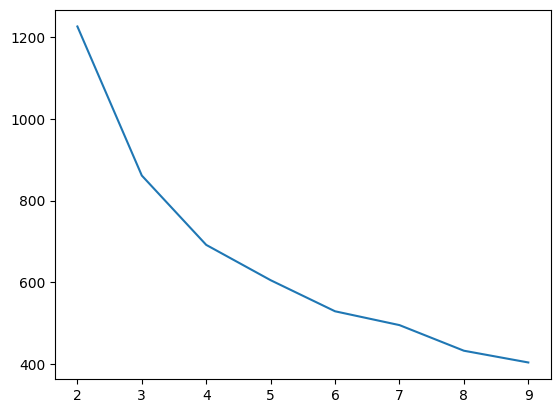

In [75]:
elbow_method(data_class)

Метод силуэта


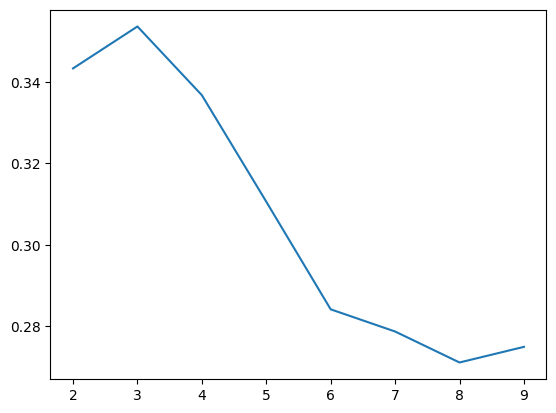

In [76]:
siluet_method(data_class)

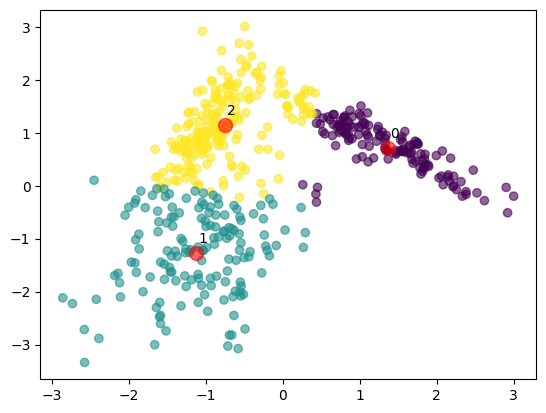

In [77]:
kmeans_class = KMeans(3,  n_init='auto').fit(data_class)
plot_scatter(kmeans_class, data_class)

> Оптимальное количество кластеров для data_class: **3**

#### <span style = "color:rgb(215, 106, 51)"> DBSCAN </span>

#####
- data_blobs

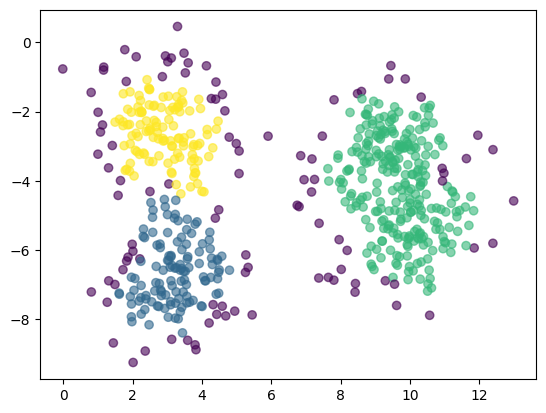

In [78]:
dbscan_blobs = DBSCAN(min_samples=9).fit(data_blobs)
plot_scatter(dbscan_blobs, data_blobs, False)

In [159]:
print_metrics(dbscan_blobs, data_blobs)

            Внутренние метрики
Silhouette            0.443655
Calinski            458.869396


#####
- data_class

[-1  0  1  2]


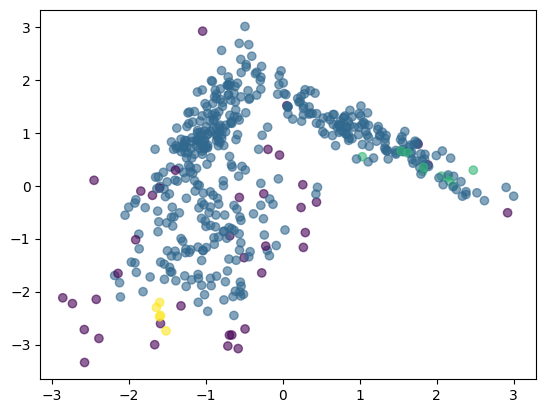

In [79]:
import numpy as np

dbscan_class = DBSCAN(min_samples=5, eps=0.6).fit(data_class)
print(np.unique(dbscan_class.labels_))

plot_scatter(dbscan_class, data_class, False)


In [80]:
print_metrics(dbscan_class, data_class, data_class_y, True)

            Внутренние метрики
Silhouette            0.045559
Calinski             21.754131
               Внешние метрики
R-score               0.406429
Fowlkes-score         0.523568


**ПОДБОР ГИПЕРПАРАМЕТРОВ**

In [81]:
import optuna

def objective(trial):
    min_samples = trial.suggest_int('min_samples', 2,20)
    eps = trial.suggest_float('eps', 0.1, 2.0)
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(data_class)

    rs = rand_score(data_class_y, dbscan.labels_)
    return rs


In [82]:
from ml_library.hyperparams import optuna_params

best_dbscan_params = optuna_params(objective, 'maximize')
best_dbscan_params

{'min_samples': 8, 'eps': 0.5095486334055643}

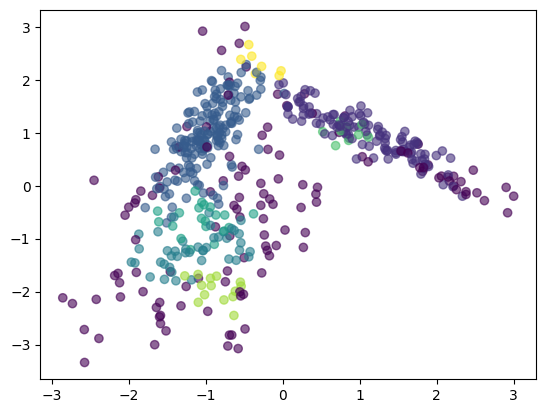

In [83]:
dbscan_class_best = DBSCAN(eps=best_dbscan_params['eps'], min_samples=best_dbscan_params['min_samples']).fit(data_class)
plot_scatter(dbscan_class_best, data_class, centroiids=False)

##### Метрики

In [84]:
print_metrics(dbscan_class_best, data_class, data_class_y, True)

            Внутренние метрики
Silhouette            0.006165
Calinski             54.098564
               Внешние метрики
R-score               0.777098
Fowlkes-score         0.616108


#### <span style = "color:rgb(133, 204, 245)"> EM-алгоритм </span>

##### data_blobs

**ПОДБОР ГИПЕРПАРАМЕТРОВ**

In [85]:
def objective(trial):
    n_components = trial.suggest_int("n_components", 2,10)
    covariance_type = trial.suggest_categorical("covariance_type", ['full', 'tied', 'diag', 'spherical'])
    #reg_covar = trial.suggest_float('reg_covar', 1e-6, 1e-1)

    gm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, n_init=10).fit(data_blobs)

    ss = silhouette_score(data_blobs, gm.predict(data_blobs))

    return ss

In [86]:
best_gm_params = optuna_params(objective, 'maximize')

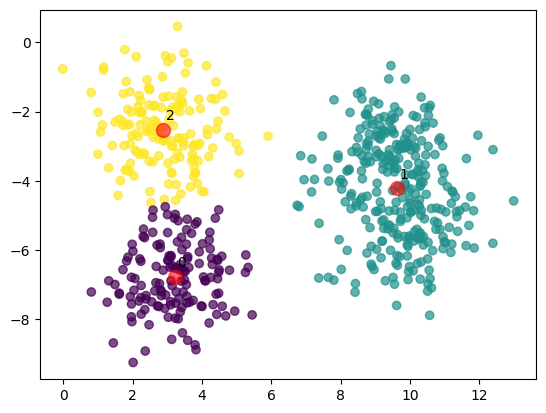

In [87]:
best_gm_blobs = GaussianMixture(n_components=best_gm_params['n_components'], covariance_type=best_gm_params['covariance_type']).fit(data_blobs)
plot_scatter_gm(best_gm_blobs, data_blobs)

In [88]:
print_metrics(best_gm_blobs, data_blobs, labels=best_gm_blobs.predict(data_blobs))

            Внутренние метрики
Silhouette            0.622641
Calinski           1518.948307


##### data_class

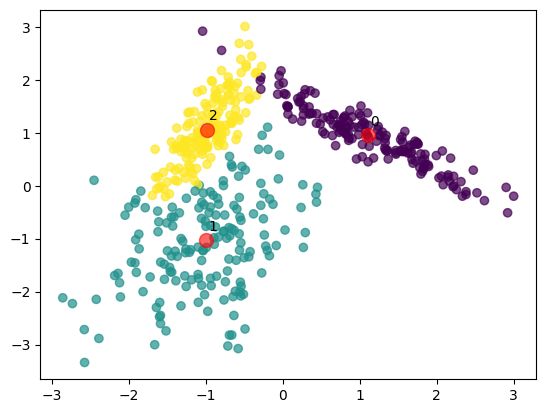

In [89]:
gm_class = GaussianMixture(n_components=3).fit(data_class)
plot_scatter_gm(gm_class,data_class)

##### Метрики

In [90]:
print_metrics(gm_class, data_class, data_class_y, True, gm_class.predict(data_class))

            Внутренние метрики
Silhouette            0.314723
Calinski            266.838969
               Внешние метрики
R-score               0.938830
Fowlkes-score         0.907886


#### <span style = "color:rgb(148, 97, 234)"> Affinity Propagation </span>

##### data_blobs

**ПОДБОР ГИПЕРПАРАМЕТРОВ**

In [91]:
def objective(trial):
    damping = trial.suggest_float("damping", 0.5, 0.7)
    preference = trial.suggest_float("preference", -50, -20)

    ap = AffinityPropagation(damping=damping, preference=preference, random_state=20).fit(data_blobs)

    ss = silhouette_score(data_blobs, ap.labels_)

    return ss

In [92]:
best_ap_blobs_params = optuna_params(objective, 'maximize')

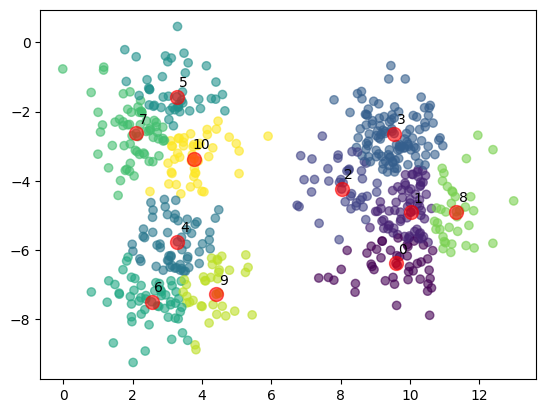

In [93]:
best_ap_blobs = AffinityPropagation(damping=best_ap_blobs_params['damping'], preference=best_ap_blobs_params['preference'], random_state=20).fit(data_blobs)
plot_scatter(best_ap_blobs, data_blobs)

In [94]:
print_metrics(best_ap_blobs, data_blobs)

            Внутренние метрики
Silhouette            0.354694
Calinski           1102.700036


##### data_class

**ПОДБОР ГИПЕРПАРАМЕТРОВ**

In [95]:
def objective(trial):
    damping = trial.suggest_float("damping", 0.5, 0.99)
    preference = trial.suggest_float("preference", -50, 0)
    ap = AffinityPropagation(damping=damping,preference=preference).fit(data_class)

    rs = rand_score(data_class_y, ap.labels_)
    # ss = silhouette_score(data_class, ap.labels_)
    return rs


In [96]:
best_ap_class_params = optuna_params(objective, 'maximize')

c:\Users\fiks1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:162: ConvergenceWarning: Affinity propagation did not converge and this model will not have any cluster centers.
  warnings.warn(
c:\Users\fiks1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\fiks1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
c:\Users\fiks1\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\cluster\_affinity_propagation.py:162: ConvergenceWarning: Affinity propagation did not converge and this model will not have any cluster centers.
  warnings.warn(


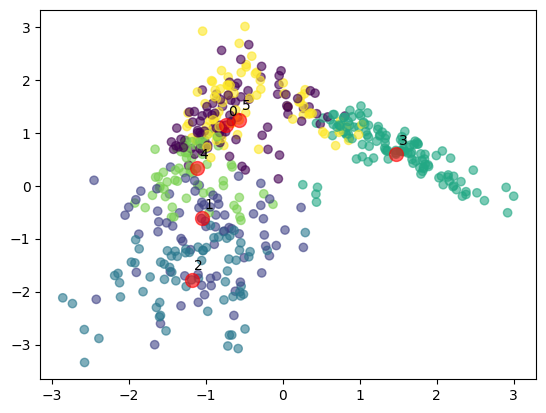

In [97]:
best_ap_class = AffinityPropagation(damping=best_ap_class_params['damping'], preference=best_ap_class_params['preference']).fit(data_class)
plot_scatter(best_ap_class, data_class)

##### Метрики

In [98]:
print_metrics(best_ap_class, data_class, data_class_y, True)

            Внутренние метрики
Silhouette            0.286608
Calinski            253.257976
               Внешние метрики
R-score               0.749034
Fowlkes-score         0.530310


#### <span style = "color:rgb(124, 82, 118)"> Иерархическая кластеризация </span>

In [99]:
from scipy.cluster import hierarchy

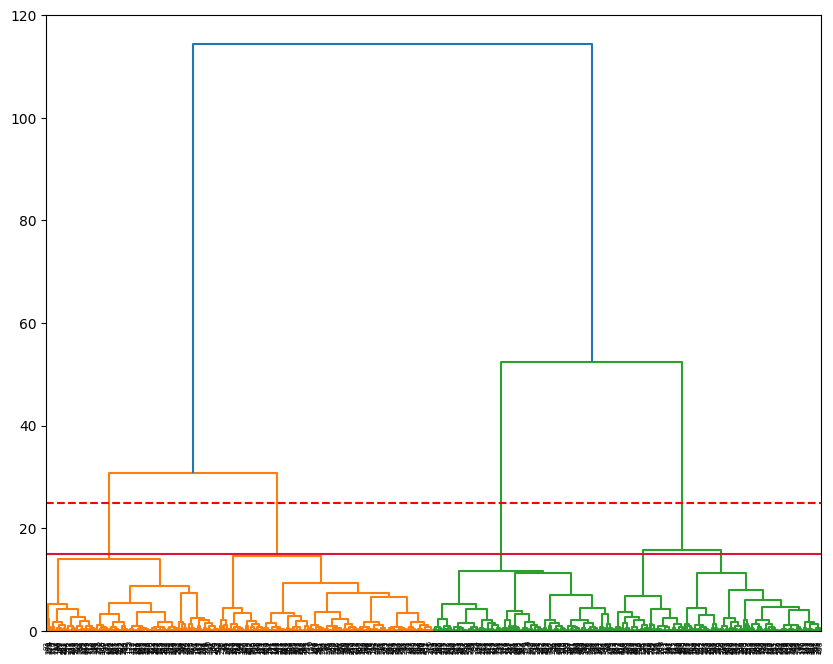

In [100]:
clusters = hierarchy.linkage(data_blobs, method='ward')

plt.figure(figsize=(10,8))
dendrogram = hierarchy.dendrogram(clusters)

plt.axhline(25, color = 'red', linestyle = '--');

plt.axhline(15, color = 'crimson');

##### AgglomerativeClustering

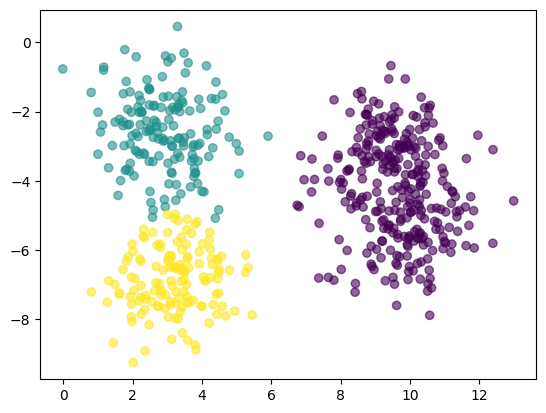

In [101]:
from sklearn.cluster import AgglomerativeClustering

ac_blobs = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(data_blobs)

plot_scatter(ac_blobs, data_blobs, centroiids=False)    

##### Метрики

In [102]:
print_metrics(ac_blobs, data_blobs)

            Внутренние метрики
Silhouette            0.619671
Calinski           1506.068124


#### Добавление стобца ```cluster``` в датасет классификации data_class

In [103]:
data_class['cluster'] = kmeans_class.predict(data_class)
data_class

,0,1,2,cluster
0,0.929711,1.107382,0.003671,0
1,-0.781490,1.499501,1.064040,2
2,-0.672780,1.616372,0.130243,2
3,-0.974872,1.369593,0.407455,2
4,1.181402,0.523761,-0.740561,0
...,...,...,...,...
495,-0.685565,1.331271,1.413376,2
496,-0.669729,1.211450,0.273152,2
497,0.669280,1.345003,0.174210,0
498,-1.428676,-0.761461,1.009507,1


##### Характеристики кластеров

In [104]:
data_class['cluster'].describe()

count    500.0000
mean       1.1600
std        0.8196
min        0.0000
25%        0.0000
50%        1.0000
75%        2.0000
max        2.0000
Name: cluster, dtype: float64

In [105]:
data_class['cluster'].value_counts()

cluster
2    214
1    152
0    134
Name: count, dtype: int64

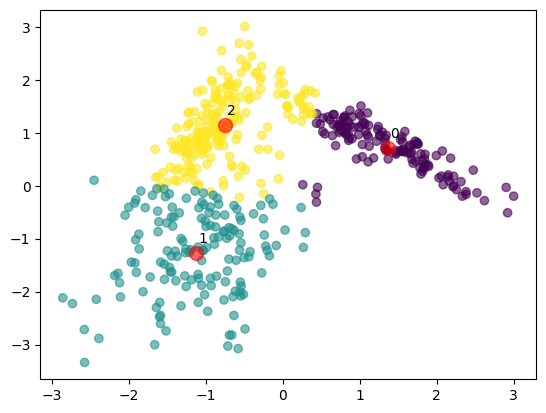

In [106]:
plot_scatter(kmeans_class, data_class)

### Реализация собственного кластеризатора ```k-means```

In [153]:
from ml_library.cluster import KMeansCustom

##### data_blobs

In [154]:
kmeans_custom = KMeansCustom(3)

kmeans_custom.fit(data_blobs)

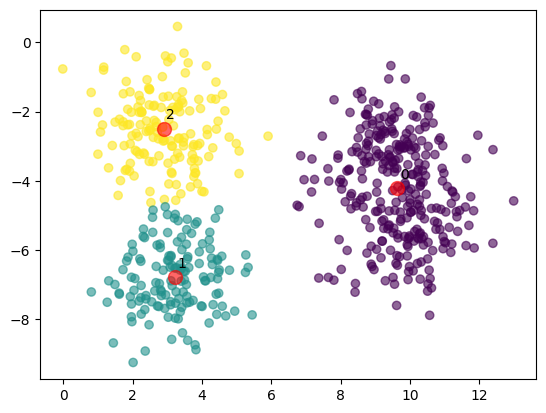

In [155]:
plot_scatter(kmeans_custom, data_blobs)

In [156]:
print_metrics(kmeans_custom, data_blobs)

            Внутренние метрики
Silhouette            0.622641
Calinski           1518.948307


#### data_class

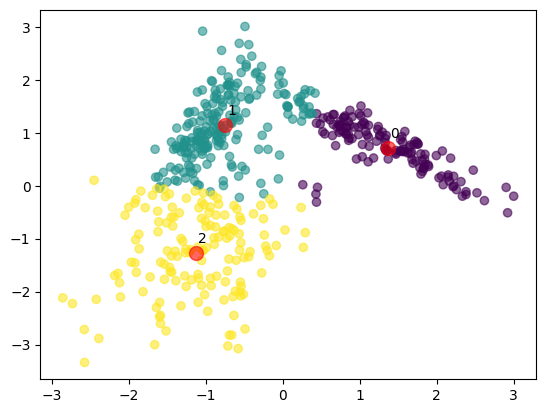

In [157]:


kmeans_custom_class = KMeansCustom(n_clusters=3)

kmeans_custom_class.fit(data_class)

plot_scatter(kmeans_custom_class, data_class)

##### Метрики

In [158]:
print_metrics(kmeans_custom_class, data_class, data_class_y, True)

            Внутренние метрики
Silhouette            0.449528
Calinski            406.707722
               Внешние метрики
R-score               0.810942
Fowlkes-score         0.721357


### <span style = "color:rgb(120, 187, 127)">Выводы по лабораторной работе </span>

- Лучшими моделями кластеризации для **синтетических данных** стали:

    ``` KMeans```

    ``` GaussianMixture```

    ```KMeansCustom```

    с метриками: Silhouette: 0.622641,  Calinski: 1518.948307

- Лучшей моделью кластеризации для решения задачи **классификации**: 

    ```GaussianMixture``` 

    с метриками: R-score: 0.938830, Fowlkes-score: 0.907886
